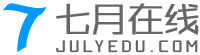


# 七月在线 《Python基础入门 第三期》 第六课 面向对象基础


> [七月在线](https://www.julyedu.com) David@2018-12-16

## 本节课程目标
### 复习上节课内容
### 面向对象思想
### 类的设计与创建
### 类实例化对象并使用
### 类成员一览
### 类中的关键字与装饰器
### 完成课后作业：

## 面向对象思想

### 面向对象编程

- 类class与对象object 
> - 对属于同一类事物的抽象叫类class
>   - 比如汽车，门，猫。 
>   - 之前学习使用的都是Python自带的数据类，这节课我们学习自己定义类class
> - 某类事物中的一个具体的实例叫对象Object
>   - 比如我家的那辆汽车，张伟办公室的大门，隔壁丽丽家的那只小花猫。

- 类与对象的关系
> - 类定义封装了数据与方法，类就是对象的模板，可以批量生产出许多的对象。
>   - 比如`a=7`,7其实是整形数字int类的一个实例。那int这个类还可以’复刻’出许许多多的整形对象。这些对象共有的特征就是：整数性。
> - 类(class)的变量是所有对象共享使用, 只有一个拷贝, 所有对象修改, 都可以被其他对象所见; 
> - 对象(object)的变量由类的每个对象所拥有, 每个对象都包含自己的一份拷贝, 不会影响其他对象;

### Python中一切皆对象

In [2]:
#Python中的一切对象都可以使用type查看它的类

In [4]:
#isinstance,issubclass的使用

## 类的设计与创建

In [2]:
#学生类设计
#总学生的人数，全部学生的姓名，已经毕业的学生的数量
#考试功能，分数大于60分，pass,，计入总分，否则 fail
#查分功能，如果考试次数
#查所有已经毕业学员的姓名。


class Student():
    student_total = 0
    student_graduated=0
    student_namelist=[]
    student_graduated_name_list=[]
    
    def __init__(self,name,age,gender):
        self.name=name
        self.age=age
        self.gender=gender
        self.__score=0
        self.times=0#考试次数
        Student.student_total+=1
        Student.student_namelist.append(name)

    def exam(self,examscore):#def函数在类中定义叫方法method,以和类外部定义的函数区分
        if self.times==8:
            return 'you already qualified,winner,no need to take exam again'
        
        if examscore<60:        
            print('sorry,better luck next time!')
        elif examscore>100:
            print('you are cheating!')
        else:
            self.__score+=examscore
            self.times+=1
            print('OK!')
            if self.times==8 and self.__score/self.times>80:#如果参加了八次考试，且平均分数大于80分，即可毕业
                Student.student_graduated+=1
                Student.student_graduated_name_list.append(self.name)
                
            
    
    def check(self,):
        if self.times<8:
            return 'you need to do more {8-self.times} tests to graduate!'
        elif self.__score/self.times<80:
            return 'sorry，you are not qualified in julyedu.com，your mean score is {self.__score/self.times}'            
        else:
            return 'you alreay graduated,winner!'

    @classmethod
    def get_graducated_student(cls,):
        return Student.student_graduated
    
    @classmethod
    def get_graducated_student_list(cls,):
        return Student.student_graduated_name_list

## 类实例化对象并使用

In [3]:
#实例化并使用上面创建的类，并使用

##  类成员一览

- 数据成员
  - 类变量与实例变量
- 方法成员
  - 类方法与实例方法

###### 扩展阅读：私有成员

In [ ]:
#私有成员：对类内部的属性及方法，通过在在标识符前加双 下划线__来实现的私有化
#即使是在成员名面前加了__，依旧可以访问到。
 #因为python使用一种 name mangling 技术，将 __membername替换成 _classname__membername
no2._Student__score
### dir(no22)

## 类中的关键字与装饰器详解

### 类中的关键字

In [ ]:
#关键字
# cls
# cls是指向类的指针，在类方法中第一个形参要命名为cls.

# self
# self是指向每个独立对象的指针.在实例方法中第一个形参被命名为self,以区别其它函数。 
#对象方法以self参数，类方法以cls参数来传递。

### 类中的装饰器

In [ ]:

#装饰器
#@staticmethod：类静态方法
#@classmethod：类方法


#@property—把函数调用伪装成对属性的访问,数据描述符属性的优先级高于实例名称空间中的同名成员。
# 使用@property，不用再像java中使用getter,setter方法去设置和访问类变量   
# 这时，也只有通过@property，才能对实例变量进行访问或设置，实现了对变量访问的控制，

class Student1():
    def __init__(self,name,age):  ###__init__实例初始化
        self.name = name       ####self:实例变量，变量的名字叫name
        self.__age=age
        
    @property #getter
    def name1(self):
        return self.name
    
    @name1.setter  # setter
    def name1(self,newname):
        self.name = newname
        
    @property #getter
    def age(self):
        return 0
    @age.setter  # setter
    def age(self,newage):
        self.__age = newage
        
# 上面这样设置的是类变量可以被类实例随意访问，修改。
# 注意，这里的name1，如果和实例变量name重名会导致，无限递归！！！
# RecursionError: maximum recursion depth exceeded while calling a Python object

# 但如果想让@property和类实例变量同名呢？  
# 将实例变量设置为私有(像age一样)就不会导致重名引发递归死机了
s1=Student1('jack',33)
s1.name1

s1.age#getter
s1.age=22#setter

s1.age

##### 扩展阅读 魔术方法,`__*__`
- 魔法方法就是可以给你的类增加魔力的特殊方法，如果你的对象实现（重载）了这些方法中的某一个，那么这个方法就会在特殊的情况下被 Python 所调用，
- 你可以定义自己想要的行为，这些会自动发生。
- 它们经常是两个下划线包围来命名的

## 课后作业：

### 完成公司类的设计
- 设计以下公司类，并实例化不同对象进行检查
- 类成员
  - 类下公司的总个数
- 类方法
  - 返回公司类共有多少个公司实例
- 实例变量
  - 公司名，简介，利润，销售额，总成本，雇员姓名，雇员人员。
- 实例方法要求有：
  - 招聘人才（每招一个人会有成本产生，影响雇员列表，人数，总成本）
  - 解雇人员（每解雇一个人会有成本产生，影响雇员列表，人数 ，总成本）
  - 公司广告推广 ( 影响总成本 )
  - 交社保 ( 按公司雇员总人数计算，影响总成本 )
  - 交税 ( 按公司雇员总人数计算，影响总成本 )
  - 销售（按销售件数 * 价格计算销售额，利润按销售额 * 利润率进行计算利润。）
  - 获取公司雇员列表
  - 获取公司净利润